<h1 style="font-size: 40px; text-align: center;">Piotr Markowski 327453</h1>

<h1 style="font-size: 30px; text-align: center;">ostatnia praca domowa</h1>

# Zróbmy najpierw niezbędne importy

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Załadujmy nasze dane

In [2]:
df = pd.read_csv('energy_dataset_.csv')

# Sprawdźmy co się w nich kryje

**Jak się nazywają kolumny**

In [3]:
print(df.columns)

Index(['Type_of_Renewable_Energy', 'Installed_Capacity_MW',
       'Energy_Production_MWh', 'Energy_Consumption_MWh',
       'Energy_Storage_Capacity_MWh', 'Storage_Efficiency_Percentage',
       'Grid_Integration_Level', 'Initial_Investment_USD', 'Funding_Sources',
       'Financial_Incentives_USD', 'GHG_Emission_Reduction_tCO2e',
       'Air_Pollution_Reduction_Index', 'Jobs_Created'],
      dtype='object')


**Jakie są przykładowe dane**

In [4]:
print(df.head(2))

   Type_of_Renewable_Energy  Installed_Capacity_MW  Energy_Production_MWh  \
0                         4              93.423205            103853.2206   
1                         4             590.468942            190223.0649   

   Energy_Consumption_MWh  Energy_Storage_Capacity_MWh  \
0             248708.4892                  2953.248771   
1             166104.1642                  5305.174042   

   Storage_Efficiency_Percentage  Grid_Integration_Level  \
0                      89.887562                       4   
1                      84.403343                       4   

   Initial_Investment_USD  Funding_Sources  Financial_Incentives_USD  \
0             473224763.9                1               9207772.186   
1             167069721.6                2               1685101.134   

   GHG_Emission_Reduction_tCO2e  Air_Pollution_Reduction_Index  Jobs_Created  
0                   6663.816572                      81.742461          1366  
1                  30656.049820      

**A jaka długość**

In [5]:
len(df)

15000

# Rodzaj danych w ramce

**Type_of_Renewable_Energy** - jakościowe nominalne

**Installed_Capacity_MW** - ilościowe ilorazowe

**Energy_Production_MWh** - ilościowe ilorazowe

**Energy_Consumption_MWh** - ilościowe ilorazowe

**Energy_Storage_Capacity_MWh** - ilościowe ilorazowe

**Storage_Efficiency_Percentage** - ilościowe ilorazowe

**Grid_Integration_Level** - jakościowe uporządkowane

**Initial_Investment_USD** - ilościowe ilorazowe

**Funding_Sources** - jakościowe nominalne

**Financial_Incentives_USD** - ilościowe ilorazowe

**GHG_Emission_Reduction_tCO2e** - ilościowe ilorazowe

**Air_Pollution_Reduction_Index** - ilościowe ilorazowe

**Jobs_Created** - ilościowe zliczeniowe


# Policzmy podstawowe statystyki na naszym zbiorze danych

Można policzyć ręcznie podstawowe statystyki, takie jak na przykład kwantyle. Dzięki temu możemy poznać kwantyl dowolnego rzędu.

In [6]:
prod_q = df['Energy_Production_MWh'].quantile([0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95])
stanowiska_q = df['Jobs_Created'].quantile([0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95])
stanowiska_q_int = stanowiska_q.round().astype(int)

print("kwantyle produkcji energii")
print(prod_q)
print("")
print("kwantyle utworzonych stanowisk po uprzednim zaokrągleniu do liczy całkowitej")
print(stanowiska_q_int)

kwantyle produkcji energii
0.05     26506.781573
0.10     51451.570774
0.25    128568.875900
0.50    253216.871250
0.75    377083.805575
0.90    452118.330430
0.95    474970.038540
Name: Energy_Production_MWh, dtype: float64

kwantyle utworzonych stanowisk po uprzednim zaokrągleniu do liczy całkowitej
0.05     262
0.10     501
0.25    1228
0.50    2496
0.75    3765
0.90    4524
0.95    4773
Name: Jobs_Created, dtype: int32


Jednak funckja 'describe' pozwala nam szybko poznać wiele podstawowych statystyk od razu dla całej ramki, które są zaprezentowane w sposób czytelny.

In [7]:
df.describe()

,Type_of_Renewable_Energy,Installed_Capacity_MW,Energy_Production_MWh,Energy_Consumption_MWh,Energy_Storage_Capacity_MWh,Storage_Efficiency_Percentage,Grid_Integration_Level,Initial_Investment_USD,Funding_Sources,Financial_Incentives_USD,GHG_Emission_Reduction_tCO2e,Air_Pollution_Reduction_Index,Jobs_Created
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,1.500000e+04,15000.000000,1.500000e+04,15000.000000,15000.000000,15000.000000
mean,3.973933,495.855747,252350.955621,225981.854966,5030.196472,75.219334,2.501267,2.514849e+08,2.004000,1.002977e+07,25234.722158,50.724179,2502.668600
std,1.999380,288.212872,144062.915425,129223.677997,2894.096326,14.485289,1.123306,1.432843e+08,0.817493,5.787303e+06,14378.915277,28.556578,1451.212661
min,1.000000,1.091767,1030.103692,584.048006,2.200208,50.003494,1.000000,1.008107e+06,1.000000,5.155842e+04,100.974460,1.009712,10.000000
25%,2.000000,245.475737,128568.875900,115587.428225,2543.341380,62.694076,1.000000,1.259709e+08,1.000000,4.963454e+06,12754.476927,26.224426,1228.000000
50%,4.000000,492.907555,253216.871250,225226.374350,5054.036248,75.279702,3.000000,2.539910e+08,2.000000,1.002414e+07,25424.477000,50.250207,2496.000000
75%,6.000000,742.254682,377083.805575,338656.214700,7536.935405,87.754318,4.000000,3.759130e+08,3.000000,1.507417e+07,37750.426285,75.720133,3765.000000
max,7.000000,999.982979,499991.200400,449922.667800,9999.145037,99.994955,4.000000,4.999407e+08,3.000000,1.999855e+07,49997.578530,99.980494,4999.000000


Zmieńmy tylko dla wygody nazwy niektórych kolumn

In [8]:
df = df.rename(columns={'Type_of_Renewable_Energy': 'typ', 
                        'Jobs_Created': 'stanowiska',
                        'Energy_Production_MWh': 'prod',
                        'Energy_Consumption_MWh': 'kons',
                        'Grid_Integration_Level': 'zint',
                        'Initial_Investment_USD': 'i_invest',
                        'Energy_Storage_Capacity_MWh': 'zbiornik'})

# Stworzymy wykres pokazujący zależność typu energii do stworzonych przez niego stanowisk pracy

Wykresy przedstawimy w postaci słupków w skali liniowej jak i logarytmicznej, aby pokazać, że wartości są względnie blisko siebie oraz zwizualizować dokładnie różnice między nimi.


In [9]:
# Sumowanie wartości w kolumnie 'Wartosci' według typu w kolumnie 'Typy'
s1 = df.groupby('typ')['stanowiska'].sum()
print(s1)

typ
1    5401364
2    5530174
3    5414246
4    5238952
5    5402836
6    5352948
7    5199509
Name: stanowiska, dtype: int64


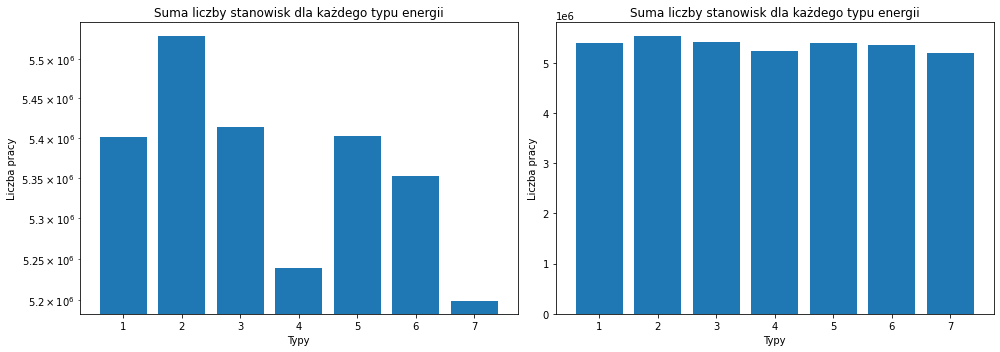

In [10]:
# Tworzenie nowej figury o wymiarach 9x5 cali
plt.figure(figsize=(14, 5))

# Tworzenie siatki dwóch wykresów obok siebie
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)

# Wykres słupkowy dla pierwszego wykresu
ax1.bar(x=s1.index, height=s1.values)
ax1.set_xlabel('Typy')
ax1.set_ylabel('Liczba pracy')
ax1.set_title('Suma liczby stanowisk dla każdego typu energii')
ax1.set_yscale('log')  # Ustawienie skali osi Y na logarytmiczną

# Wykres słupkowy dla drugiego wykresu
ax2.bar(x=s1.index, height=s1.values)
ax2.set_xlabel('Typy')
ax2.set_ylabel('Liczba pracy')
ax2.set_title('Suma liczby stanowisk dla każdego typu energii')
ax2.set_yscale('linear')  # Ustawienie skali osi Y na logarytmiczną

# Dostosowanie układu tak, aby wykresy nie nakładały się
plt.tight_layout()

plt.show()

# Wnioski:

Widzimy, że niezależnie od typu, stworzona liczba stanowisk pracy jest na podobnym poziomie. Po bliższym przyjżeniu się danym i drobnym różnicom między nimi można wywnioskować, że typ 2 średnio utworzył najwięcej miejsc pracy, a typ 4 oraz 7 najmniej.

#  Teraz przyjrzyjmy typowi się zintegrowania sieci wstępnej inwestycji

Możnaby się spodziewać, że im większa wstępna inwestycja, tym

Dane są podane w MWh

In [11]:
s2 = df.groupby('zint')['i_invest'].mean()
print(s1)

typ
1    5401364
2    5530174
3    5414246
4    5238952
5    5402836
6    5352948
7    5199509
Name: stanowiska, dtype: int64


Wykresy przedstawimy w postaci słupków w skali liniowej jak i logarytmicznej, aby pokazać, że wartości są względnie blisko siebie oraz zwizualizować różnice między nimi.

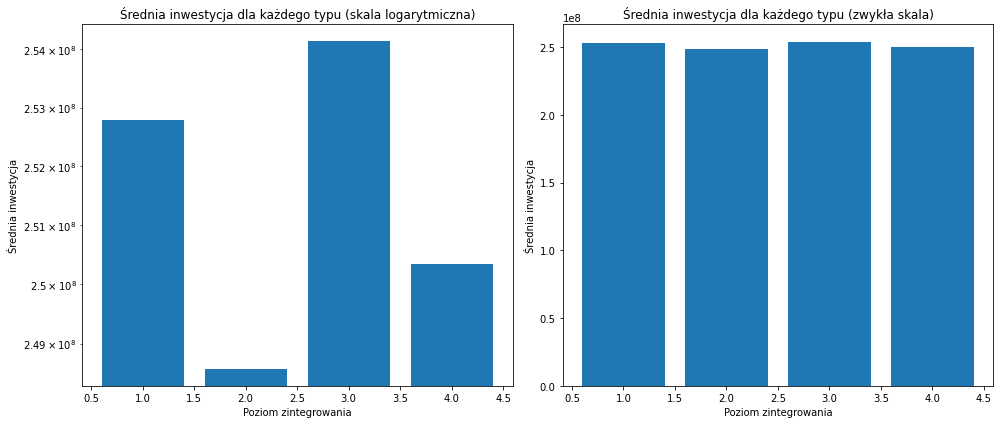

In [12]:
# Utworzenie dwóch obszarów osi obok siebie
plt.figure(figsize=(14, 6))

# Pierwszy wykres (skala logarytmiczna)
plt.subplot(1, 2, 1)  # 1 wiersz, 2 kolumny, pierwszy wykres
plt.bar(x=s2.index, height=s2.values)
plt.xlabel('Poziom zintegrowania')
plt.ylabel('Średnia inwestycja')
plt.title('Średnia inwestycja dla każdego typu (skala logarytmiczna)')
plt.yscale('log')

# Drugi wykres (zwykła skala)
plt.subplot(1, 2, 2)  # 1 wiersz, 2 kolumny, drugi wykres
plt.bar(x=s2.index, height=s2.values)
plt.xlabel('Poziom zintegrowania')
plt.ylabel('Średnia inwestycja')
plt.title('Średnia inwestycja dla każdego typu (zwykła skala)')

plt.tight_layout()  # dostosowanie układu, aby uniknąć nakładania się elementów
plt.show()

# Wnioski:

Widzimy tutaj brak zależnosći pomiędzy średnią inwestycją a poziomem zintegrowania sieci. Po dużym przybliżeniu można dostrzec różnice, lecz są one względnie znikome.

# Zależność produkcji od typu odnawialnej energii

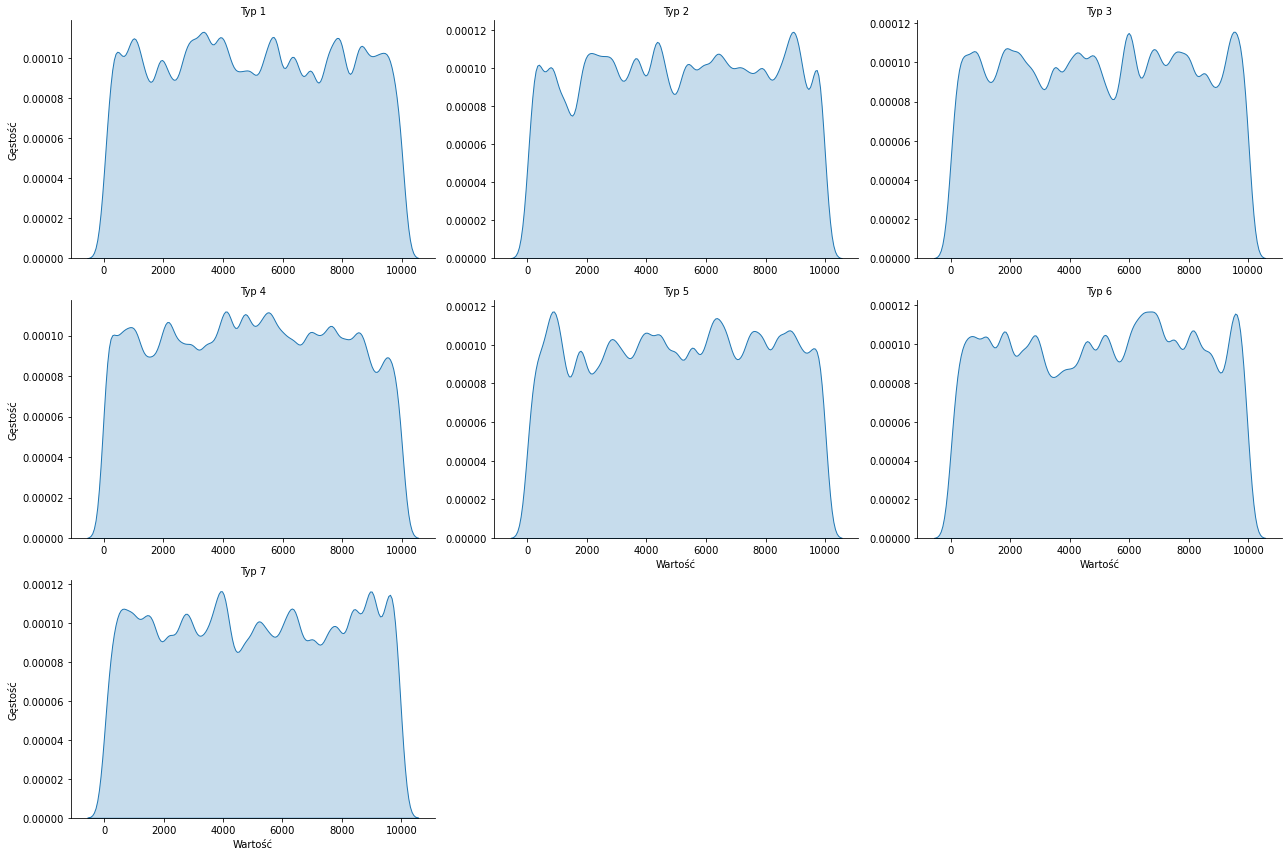

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure 'typ' is a categorical column if it's not already
df['typ'] = df['typ'].astype('category')

# Create the FacetGrid
g = sns.FacetGrid(df, col="typ", col_wrap=3, height=4, aspect=1.5, sharex=False, sharey=False)

# Map the KDE plot to each subset of the data with a smaller bandwidth for more detail
g.map(sns.kdeplot, 'zbiornik', shade=True, bw_adjust=0.3)

# Add titles and labels
g.set_axis_labels('Wartość', 'Gęstość')
g.set_titles(col_template='Typ {col_name}')

# Adjust the layout
g.tight_layout()

# Show the plot
plt.show()


# Wnioski

Widzimy, że niezależnie od typu odnawialnej energii, rozkłady mimo delikatnych zmian są zgrubsza takie same.

# Zobaczmy teraz jaka jest zależność produkcji od konsumpcji

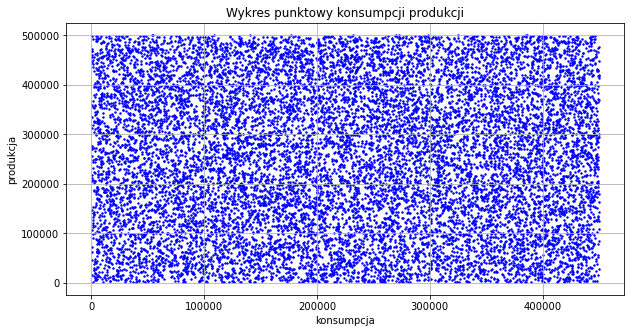

In [14]:
plt.figure(figsize=(10, 5))
plt.scatter(df['kons'], df['prod'], color='blue', s=2)
plt.title('Wykres punktowy konsumpcji produkcji')
plt.xlabel('konsumpcja')
plt.ylabel('produkcja')
plt.grid(True)
plt.show()

Miałem nadzieje, że będzie coś można z tego odczytać, lecz jedyne co narazie możemy zobaczyć, to raczej jednostajny rozkład naszych obserwacji oraz brak dużych punktów skupienia.

**Znalazłem na internecie taką opcję**

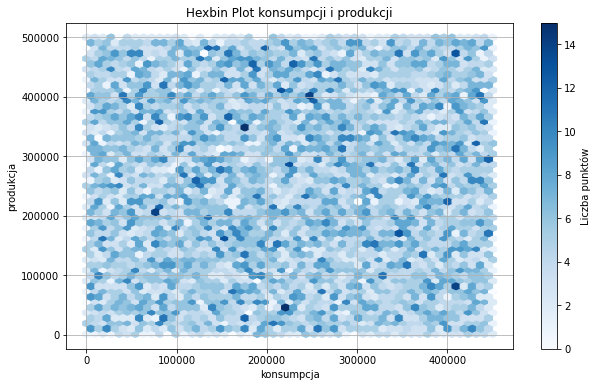

In [15]:
plt.figure(figsize=(10, 6))
plt.hexbin(df['kons'], df['prod'], gridsize=50, cmap='Blues')
plt.colorbar(label='Liczba punktów')
plt.title('Hexbin Plot konsumpcji i produkcji')
plt.xlabel('konsumpcja')
plt.ylabel('produkcja')
plt.grid(True)
plt.show()


Możemy tu zobaczyć, że naprawde nie ma za bardzo dużych punktów skupienia ani pustek, ale niestety więcej raczej nie wywnioskujemy.

Być może pokolorowanie według zmiennej jakościowej nominalnej pomoże.

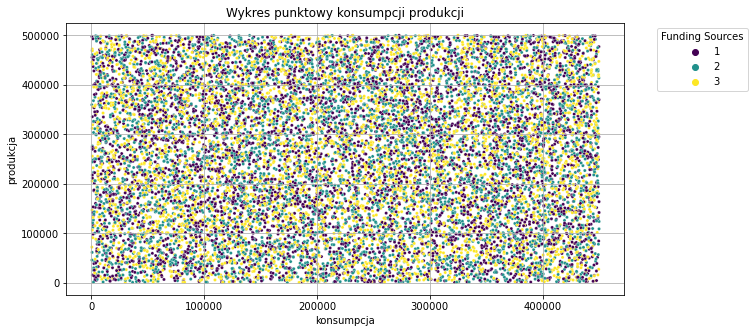

In [16]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='kons', y='prod', hue='Funding_Sources', palette='viridis', s=10)
plt.title('Wykres punktowy konsumpcji produkcji')
plt.xlabel('konsumpcja')
plt.ylabel('produkcja')
plt.grid(True)
plt.legend(title='Funding Sources', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Nie pomogło

Może inna zmienna nominalna?

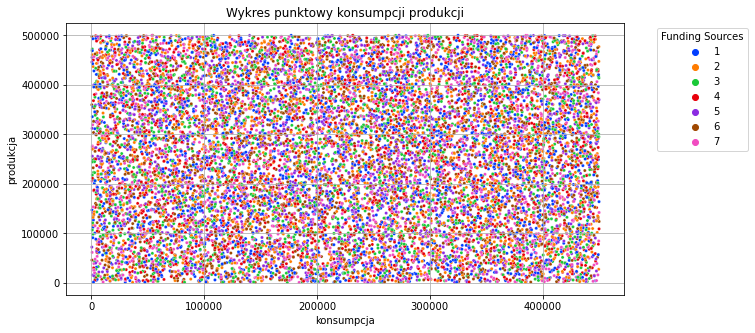

In [17]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='kons', y='prod', hue='typ', palette='bright', s=10)
plt.title('Wykres punktowy konsumpcji produkcji')
plt.xlabel('konsumpcja')
plt.ylabel('produkcja')
plt.grid(True)
plt.legend(title='Funding Sources', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

No można się kłócić, że coś tu widać.

Przefiltrujmy te dane, zostawmy tylko te linijki z 'Funding_Sources' równym 1

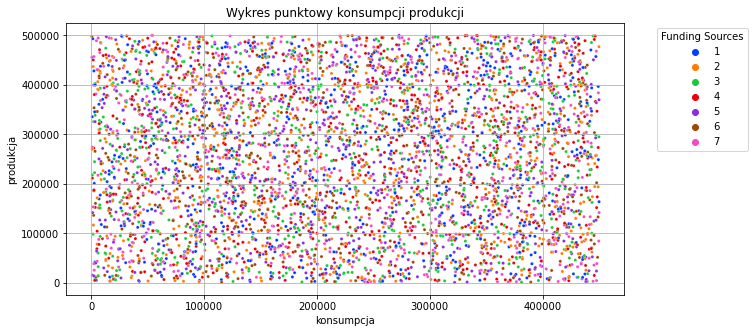

In [18]:
df1 = df[df['Funding_Sources'] == 1]

plt.figure(figsize=(10, 5))
sns.scatterplot(data=df1, x='kons', y='prod', hue='typ', palette='bright', s=10)
plt.title('Wykres punktowy konsumpcji produkcji')
plt.xlabel('konsumpcja')
plt.ylabel('produkcja')
plt.grid(True)
plt.legend(title='Funding Sources', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Poddaje się z wnioskami, nie wiem co z tego można wywnioskować, chyba tylko, że niezbyt ładny obrazek.

# Spróbuję szczęścia z innymi danymi oraz z innym rodzajem wykresu

Mieliśmy znaleźć jakieś zależności. Prawdopodobnie pomiędzy kosztem i wsparciem finansowym a liczbą utworzonych stanowisk pracy.

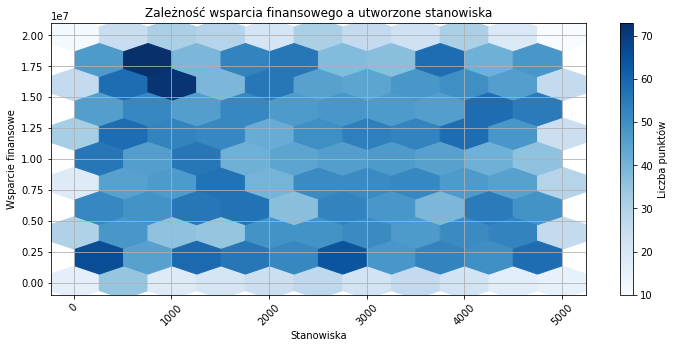

In [19]:
plt.figure(figsize=(12, 5))
plt.hexbin(df1['stanowiska'], df1['Financial_Incentives_USD'], gridsize=10, cmap='Blues')
plt.colorbar(label='Liczba punktów')
plt.title('Zależność wsparcia finansowego a utworzone stanowiska')
plt.xlabel('Stanowiska')
plt.ylabel('Wsparcie finansowe')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Możemy zauważyć, że duże wsparcie nie koreluje z utworzeniem dużej liczby stanowisk.

To niestety było najelpsze co udało mi się uzyskać :(

# Przyjrzyjmy się czy istnieje korelacja w Funding_Sources = 1 między pojemnością energetyczną a produkcją

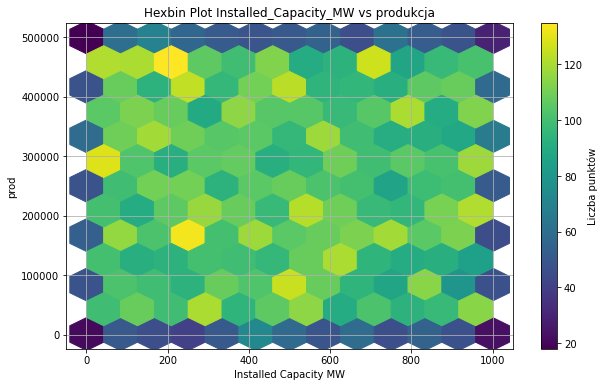

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
hb = plt.hexbin(df['Installed_Capacity_MW'], df['prod'], gridsize=12, cmap='viridis')
plt.colorbar(hb, label='Liczba punktów')
plt.title('Hexbin Plot Installed_Capacity_MW vs produkcja')
plt.xlabel('Installed Capacity MW')
plt.ylabel('prod')
plt.grid(True)
plt.show()


Możemy zauważyć, że nie ma żadnej zależności, niestety.

# Zobaczmy jak rozkłada się produkcja energii dla tych miejsc, gdzie liczba utworzonych stanowisk jest wieksza od 4000

In [21]:
df_filtered = df[df['stanowiska'] > 4900]
len(df_filtered)

306

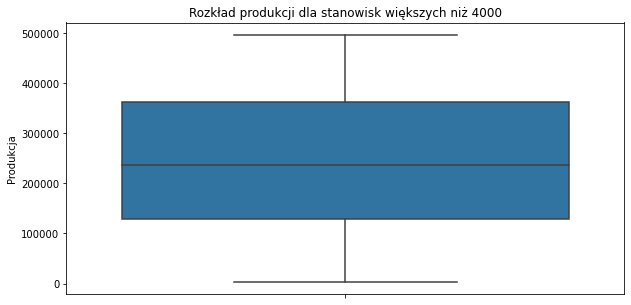

In [22]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_filtered, y='prod')
plt.title('Rozkład produkcji dla stanowisk większych niż 4000')
plt.ylabel('Produkcja')
plt.show()


Te dane są tragiczne, takie ujednolicone, symetryczne...

Dobra, poddaje się, miłego dnia